# Машинное обучение, DS-поток
## Задание 1.3


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Теоретические задачи необходимо оформить в LaTeX/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.

**Баллы за задание:**

* Задача 1 — 1 балл
* Задача 2 — 1 балл
* Задача 3 — 3 балла
* Задача 4 — 1 балл
* Задача 5 — 7 баллов

## Теория

Рассмотрим задачу бинарной классификации, причем $\mathscr{Y} = \{+1, -1\}$. Пусть так же $\widehat{y}$ &mdash; некоторый классификатор, предсказывающий степень принадлежности классу. При этом решающее правило имеет вид 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
Рассмотрим логистическую функцию потерь:
$$\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big)$$

### Задача 1

Покажите, что задача минимизации функционала ошибки $Q(\widehat{y}) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}(x_i)\right)$ для логистической функции потерь эквивалентна максимизации по $y$ функции правдоподобия в предположении $Y_i \sim Bern(\sigma(X_i)), Y_i \in \{-1, +1 \}$.

### Задача 2

Рассмотрим градиентный бустинг с логистической функцией потерь. Выпишите для градиентного спуска формулу для вектора сдвигов и задачу поиска новой базовой модели. 

### Задача 3

Предположим, модель градиентного бустинга $\widehat{y}_{t - 1}$ уже построена.
1. Выпишите вид функционала ошибки $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ для логистической функции потерь. Одинаковый ли вклад вносят разные объекты в ошибку?
2. Посмотрите на формулу для вектора сдвигов, полученную в предыдущей задаче. Как она выражается через отклики на объектах обучающей выборки? Одинаковый ли вклад вносят разные объекты в формирование вектора сдвигов?
3.  На лекции было показано, что для экспоненциальной функции есть проблема: базовый классификатор может настраиваться только на шумовые объекты. Наблюдается ли такая проблема у логистической функции потерь? Как она ведет себя на объектах с сильно отрицательным, околонулевым, сильно положительным отсупами?

### Задача 4

Рассмотрим градиентный бустинг над решающими деревьями. После построения дерева будем делать перенастройку в листьях дерева.
1. Выпишите оптимизационную задачу для коэффициентов $\gamma_{tj}$ &mdash; новых ответов в листьях.
2. Решите полученную задачу сделав один шаг метода Ньютона из начального приближения $\gamma_{tj} = 0$, что соответствует отсутствию базовой модели $b_t$.


## Практика

### Задача 5

**Внимание!** 

Перед выполнением задачи прочитайте полностью условие. В задаче используются смеси различных моделей с разными гиперпараметрами. Подумайте над тем, какой гиперпараметр как подбирать и на каком множестве. Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

### 1.

Повторите исследование, проведенное в задаче 2 предыдущего домашнего задания, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом. 

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 3 до 15];
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

*Замечания.*
* В качестве основы можно использовать как свое решение предыдущего задания, так и выложенное на Вики. В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.

*Решение*

1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
количество деревьев (n_estimators) [от 1 до 400];
максимальная глубина дерева (max_depth) [от 3 до 15];
скорость обучения (learning_rate), поясните также смысл этого параметра.

In [173]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils import shuffle

sns.set(font_scale=1.5)

In [3]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17
)

In [39]:
def plot_dependence_test(param_grid, test_values, labels, param_label,
                         metrics_label, title, ylim=None):
    '''
    Функция для построения графиков зависимости целевой метрики 
    от некоторого параметра модели на валидационной выборке.
    
    Параметры.
    1) param_grid — значения исследуемого параметра,
    2) test_values — значения метрики на валидационной выборке,
    3) labels — подписи к получаемым кривым, 
    4) param_label — названия параметра,
    5) metrics_label — название метрики,
    6) title — заголовок для графика,
    7) ylim — пределы по Oy.
    '''
    
    plt.figure(figsize=(12, 6))
    for i, test_value in enumerate(test_values):
        plt.plot(param_grid, test_value, label=labels[i], linewidth=3)
   
    plt.xlabel(param_label)
    plt.ylabel(metrics_label)
    plt.ylim(ylim)
    plt.legend()
    plt.title(title)
    plt.show()

In [42]:
%%time
regressor = RandomForestRegressor(n_estimators=400, random_state=42)
regressor.fit(X_train, y_train)

predictions_by_tree = np.array(
    [tree.predict(X_test) for tree in regressor.estimators_]
)

n_estimators_grid = np.arange(1, 401)
predictions = np.cumsum(predictions_by_tree, axis=0) \
                / n_estimators_grid[:, np.newaxis]
mse_values = [mse(y_test, p) for p in predictions]

Wall time: 28.5 s


In [43]:
%%time
boosting = GradientBoostingRegressor(n_estimators=400, random_state=42)
boosting.fit(X_train, y_train)

predictions_boost = boosting.staged_predict(X_test)
mse_values_boost = [mse(Y_test, Y_pred) for Y_pred in predictions_boost]

Wall time: 10.1 s


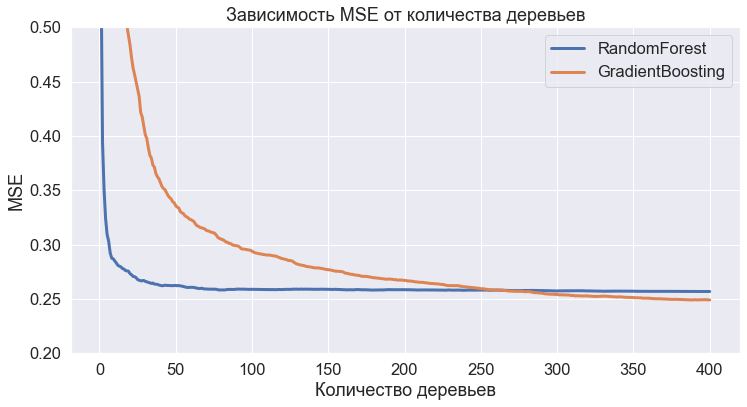

In [44]:
plot_dependence_test(n_estimators_grid, [mse_values, mse_values_boost], ['RandomForest', 'GradientBoosting'], 
                     'Количество деревьев', 'MSE', 
                     'Зависимость MSE от количества деревьев', (0.2, 0.5))

**Вывод к графику:** случайный лес начал довольно быстро сходиться, однако так же стремительно метрика затормозила свое падение с ростом количества деревьев. Бустинг же сначала серьезно проигрывал лесу, но потом засчет более сильного падения метрики к количеству деревьев 250-300 бустинг обогнал лес и стал лучше по метрике. Видимо, в бустинге при большом количестве деревьев с ростом количества деревьев довольно сильно уменьшается байес и делает это сильнее, чем уменьшается *variance* у леса (так как при большом количестве деревьев они сильнее друг с другом коррелируют).

In [37]:
mse_values = []

for max_depth in tqdm(range(3, 16)):
    regressor = RandomForestRegressor(max_depth=max_depth, 
                                      n_estimators=250, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values.append(mse(y_test, predictions))

  0%|          | 0/13 [00:00<?, ?it/s]

In [38]:
mse_values_boost = []

for max_depth in tqdm(range(3, 16)):
    regressor = GradientBoostingRegressor(max_depth=max_depth, 
                                          n_estimators=250, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values_boost.append(mse(y_test, predictions))

  0%|          | 0/13 [00:00<?, ?it/s]

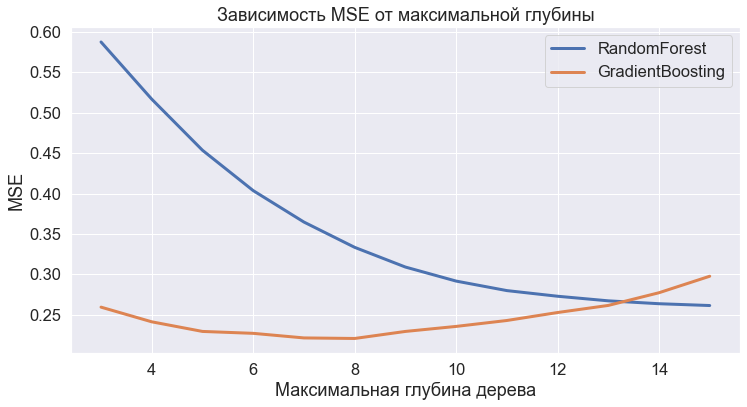

In [41]:
plot_dependence_test(np.arange(3, 16), [mse_values, mse_values_boost], ['RandomForest', 'GradientBoosting'], 
                     'Максимальная глубина дерева', 'MSE', 
                     'Зависимость MSE от максимальной глубины')

**Вывод к графику:** случайный лес на глубине от 3 до 15 так и не переобучился, лишь замедлил рост метрики. Бустинг сразу же  при маленькой глубине показал хороший результат, но где-то с глубины 8 начал переобучаться. Это говорит нам о том, что бустинг на большой глубине имеет свойство переобучаться.

In [50]:
mse_values_boost = []

for lr in tqdm(np.logspace(-5, 0, 11)):
    regressor = GradientBoostingRegressor(learning_rate=lr, 
                                          n_estimators=400, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values_boost.append(mse(y_test, predictions))

  0%|          | 0/11 [00:00<?, ?it/s]

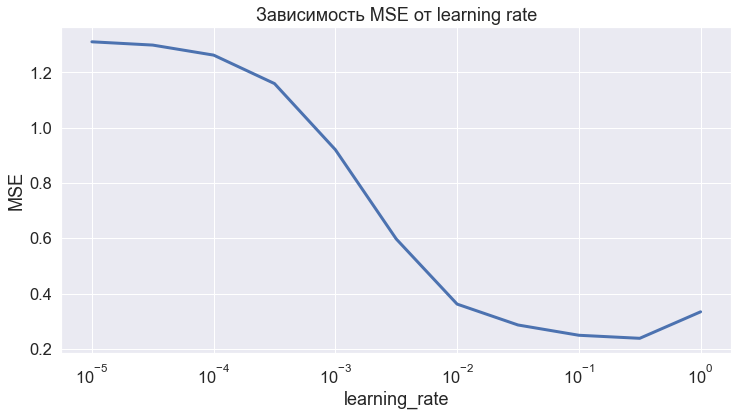

In [55]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.logspace(-5, 0, 11), mse_values_boost, linewidth=3)

ax.set_xscale('log')
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('Зависимость MSE от learning rate')
plt.show()

In [86]:
mse_values_boost = []

for lr in tqdm(np.linspace(0.05, 0.55, 6)):
    regressor = GradientBoostingRegressor(learning_rate=lr, 
                                          n_estimators=400, random_state=42)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values_boost.append(mse(y_test, predictions))

  0%|          | 0/6 [00:00<?, ?it/s]

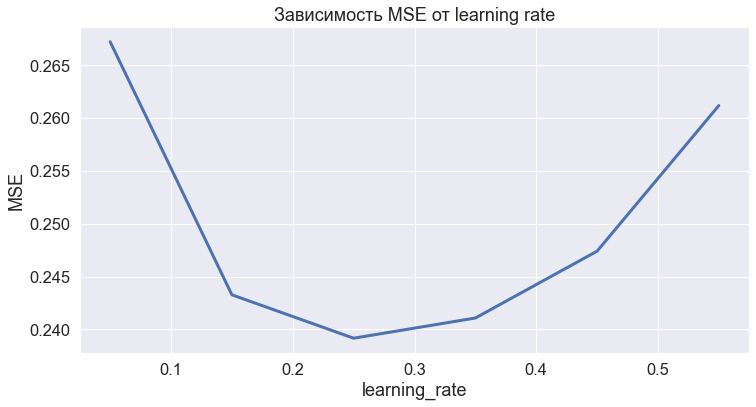

In [87]:
fig = plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0.05, 0.55, 6), mse_values_boost, linewidth=3)
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('Зависимость MSE от learning rate')
plt.show()

**Вывод к графикам:** из графиков видно, что оптимальный параметр `learning_rate` примерно 0.25. Он отвечает за то, какого размера шаг в сторону антиградиента мы делаем и помогает не переобучаться. 

2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.

In [83]:
for iteration in tqdm(range(3)):
    regressor = GradientBoostingRegressor()
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    print('MSE = {:.4f}'.format(mse(y_test, predictions)))

  0%|          | 0/3 [00:00<?, ?it/s]

MSE = 0.2940
MSE = 0.2940
MSE = 0.2940


**Вывод:** результаты оказались одинаковыми. Мне кажется, это произошло потому, что бустинг не бутстрепирует выборки, как, например, это делает случайный лес, поэтому меньше влияние случайности на построение бустинга.

3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.

In [266]:
gb_randomsearch = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_distributions={
        'max_depth': [None] + np.arange(3, 20).tolist(), 
        'n_estimators': np.arange(25, 401),
        'learning_rate': np.logspace(-5, -1, 20).tolist() + np.linspace(0.15, 1, 18).tolist()
    },
    scoring='neg_mean_squared_error',  # оптимизируемый скор
    cv=5,  # разбиение выборки на 5 фолдов
    verbose=1,  # насколько часто печатать сообщения
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=100,  # кол-во итераций случайного выбора гиперпараметров
    random_state=0  # seed для фиксации генератора случайных чисел
)

In [267]:
%%time
gb_randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 8min 39s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'learning_rate': [1e-05,
                                                          1.623776739188721e-05,
                                                          2.6366508987303556e-05,
                                                          4.281332398719396e-05,
                                                          6.951927961775606e-05,
                                                          0.00011288378916846884,
                                                          0.00018329807108324357,
                                                          0.00029763514416313193,
                                                          0.0004832930238571752,
                                                          0.0007847599703514606,
                                                          0.0012...
       324, 3

In [268]:
gb_randomsearch.best_params_

{'n_estimators': 289, 'max_depth': 9, 'learning_rate': 0.03792690190732246}

In [269]:
gb_randomsearch.best_score_

-0.22144149112761485

In [270]:
est = gb_randomsearch.best_estimator_

In [271]:
test_mse = mse(y_test, est.predict(X_test))
test_mse

0.22660161699700448

4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

In [113]:
max_depth_boost = 9
n_estimators_boost = 289
learning_rate_boost = 0.038
max_depth = 26 
n_estimators = 226

In [114]:
mse_train_values = []
mse_test_values = []
mse_train_values_boost = []
mse_test_values_boost = []

for n_features in tqdm(range(1, 9)):
    rf_regressor = RandomForestRegressor(
        max_depth=max_depth, n_estimators=n_estimators, 
        max_features=n_features, random_state=42
    )
    rf_regressor.fit(X_train, y_train)
    gb_regressor = GradientBoostingRegressor(
        max_depth=max_depth_boost, n_estimators=n_estimators_boost, 
        max_features=n_features, learning_rate=learning_rate_boost, random_state=42
    )
    gb_regressor.fit(X_train, y_train)
    
    current_train_mse = mse(y_train, rf_regressor.predict(X_train))
    current_test_mse = mse(y_test, rf_regressor.predict(X_test))
    current_train_mse_boost = mse(y_train, gb_regressor.predict(X_train))
    current_test_mse_boost = mse(y_test, gb_regressor.predict(X_test))
    
    mse_train_values.append(current_train_mse)
    mse_test_values.append(current_test_mse)
    mse_train_values_boost.append(current_train_mse_boost)
    mse_test_values_boost.append(current_test_mse_boost)

  0%|          | 0/8 [00:00<?, ?it/s]

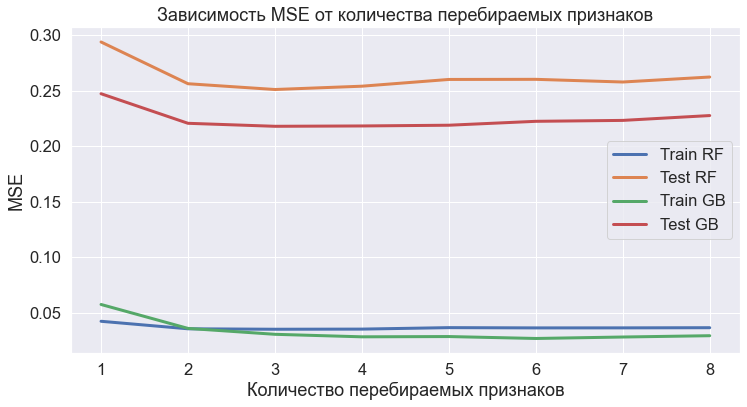

In [115]:
plot_dependence_test(np.arange(1, 9), [mse_train_values, mse_test_values, mse_train_values_boost, mse_test_values_boost,], 
                     ['Train RF', 'Test RF', 'Train GB', 'Test GB'],  
                     'Количество перебираемых признаков', 'MSE', 
                     'Зависимость MSE от количества перебираемых признаков')

**Вывод:** на тесте графики зависимости для бустинга и леса имеют похожий характер, но бустинг работает немного лучше. Трейне же бустинг при количестве признаков 3 лучше обучился под трейн и в итоге обогнал по метрике лес. Мне кажется, что похожий характер тестовых графиков и стагнация, начиная с 2-3 признаков, говорит о том, что с ростом количества перебираемых признаков обе модели немного переобучаются.

### 3.

Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. 

Для этого используйте класс `GradientBoostingRegressor`, которому при инициализации в качестве параметра `init` передайте модель ридж-регрессии `Ridge`, которая должна быть инициализирована, но необучена. Параметр `init` задает модель, выполняющую начальные предсказания, с которых стартует построение ансамбля.

Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

*Замечания.* 

1. Чтобы понять, как настроить `alpha` в `Ridge` модели внутри `GradientBoostingRegressor` вам может помочь метод `get_params()` у бустинга.
2. Не забывайте, что у бустинга тоже есть параметр `alpha`, не перепутайте их.

In [289]:
gb_regressor = GradientBoostingRegressor(init=Ridge())
gb_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init__alpha': 1.0,
 'init__copy_X': True,
 'init__fit_intercept': True,
 'init__max_iter': None,
 'init__normalize': 'deprecated',
 'init__positive': False,
 'init__random_state': None,
 'init__solver': 'auto',
 'init__tol': 0.001,
 'init': Ridge(),
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [290]:
gb_randomsearch = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42, init=Ridge()), 
    param_distributions={
        'max_depth': [None] + np.arange(3, 20).tolist(), 
        'n_estimators': np.arange(25, 401),
        'learning_rate': np.logspace(-5, -1, 20).tolist() + np.linspace(0.15, 1, 18).tolist(),
        'init__alpha': [0] + np.logspace(-5, 2, 20).tolist()
    },
    scoring='neg_mean_squared_error',  # оптимизируемый скор
    cv=5,  # разбиение выборки на 5 фолдов
    verbose=1,  # насколько часто печатать сообщения
    n_jobs=-2,  # кол-во параллельных процессов
    n_iter=50,  # кол-во итераций случайного выбора гиперпараметров
    random_state=0  # seed для фиксации генератора случайных чисел
)

In [291]:
%%time
gb_randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\poloz\anaconda3\envs\MIPT\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.89989e-08): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Wall time: 4min 49s


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(init=Ridge(),
                                                       random_state=42),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'init__alpha': [0, 1e-05,
                                                        2.3357214690901213e-05,
                                                        5.4555947811685143e-05,
                                                        0.00012742749857031334,
                                                        0.00029763514416313193,
                                                        0.0006951927961775605,
                                                        0.001623776739188721,
                                                        0.00379269019073225,
                                                        0.008858667904100823,
                                                        0.02069138081114788,...
       324, 32

In [292]:
gb_randomsearch.best_params_

{'n_estimators': 161,
 'max_depth': 5,
 'learning_rate': 0.19999999999999998,
 'init__alpha': 0.001623776739188721}

In [293]:
gb_randomsearch.best_score_

-0.22734364120113196

In [294]:
est = gb_randomsearch.best_estimator_

In [295]:
test_mse = mse(y_test, est.predict(X_test))
test_mse

0.2349417919499047

**Вывод:** качество модели не улучшилось, однако и не сильно упало. Возможно, при более точной настройке можно заметить улучшение метрики на тесте, так как для бустинга важна аккуратная и точная настройка гиперпараметров. Также стоит заметить, что лучший гиперпараметр, отвечающий за регуляризацию ридж-регрессии, оказался порядка $10^{-3},$ что довольно мало и говорит о том, что переобучение в мнк регрессии, скорее всего, было бы незначительным.

### 4. 

Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ &mdash; коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$. Удалось ли добиться улучшения качества на тестовой выборке?

In [272]:
class MixedRegression(RandomForestRegressor, GradientBoostingRegressor, BaseEstimator):
    '''
    Класс, реализующий смесь градиентного бустинга и случайного леса.
    '''
    
    def __init__(self, random_state=17, max_depth_boost=9, n_estimators_boost=289, learning_rate=0.038,
                 max_depth=26, n_estimators=226, w=0):
        '''
        Функция инициализации.
        
        Параметры:
        1) random_state — значение параметра random_state для GradientBoostingRegressor и RandomForestRegressor,
        2) max_depth_boost — значение параметра max_depth для GradientBoostingRegressor,
        3) n_estimators_boost — значение параметра n_estimators для GradientBoostingRegressor,
        4) learning_rate_boost — значение параметра learning_rate для GradientBoostingRegressor,
        5) max_depth — значение параметра max_depth для RandomForestRegressor,
        6) n_estimators — значение параметра n_estimators для RandomForestRegressor,
        7) w — гиперпараметр смешивания.
        '''
        self.random_state = random_state
        self.max_depth_boost = max_depth_boost
        self.n_estimators_boost = n_estimators_boost
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.w = w
        
        self.rf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=random_state)
        self.gb = GradientBoostingRegressor(max_depth=max_depth_boost, n_estimators=n_estimators_boost, 
                                            learning_rate=learning_rate, random_state=random_state)
        
    def fit(self, X, y):
        '''
        Функция обучения модели.
        
        :param X: матрица признаков
        :param y: значения целевой паременной
        '''
        self.rf.fit(X, y)
        self.gb.fit(X, y)
        
        return self
        
    def predict(self, X):
        '''
        Функция применения модели.
        
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        pred = self.w * self.gb.predict(X) + (1 - self.w) * self.rf.predict(X)
        
        return pred

Протестируем работу класса.

In [273]:
%%time
m_regressor = MixedRegression(w=0.5)
m_regressor.fit(X_train, y_train)
test_mse = mse(y_test, m_regressor.predict(X_test))
test_mse

Wall time: 36.2 s


0.23432392201462285

Вроде, работает и показывает адекватные результаты. Теперь найдем оптимальный параметр смеси.

In [280]:
model = MixedRegression()
gb_gridsearch = GridSearchCV(
    estimator=model, 
    param_grid={
        'w': [0] + np.logspace(-6, -1, 11).tolist() + np.linspace(0.1, 1, 41).tolist(),
    },
    scoring='neg_mean_squared_error',  # оптимизируемый скор
    cv=5,  # разбиение выборки на 5 фолдов
    verbose=1,  # насколько часто печатать сообщения
    n_jobs=-2,  # кол-во параллельных процессов
)

In [283]:
%%time
gb_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 53 candidates, totalling 265 fits
Wall time: 12min 46s


GridSearchCV(cv=5, estimator=MixedRegression(), n_jobs=-2,
             param_grid={'w': [0, 1e-06, 3.162277660168379e-06, 1e-05,
                               3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.1, 0.1225, 0.14500000000000002, 0.1675,
                               0.19, 0.2125, 0.23500000000000001, 0.2575, 0.28,
                               0.3025, 0.32499999999999996, 0.34750000000000003,
                               0.37, 0.39249999999999996, 0.41500000000000004,
                               0.4375, 0.45999999999999996, 0.48250000000000004, ...]},
             scoring='neg_mean_squared_error', verbose=1)

Выведем оптимальный параметр смеси.

In [284]:
gb_gridsearch.best_params_

{'w': 1.0}

Выведем также метрику при оптимальном параметре.

In [285]:
gb_gridsearch.best_score_

-0.22279263499153368

Посмотрим, как модель работает на тестовых данных.

In [286]:
est = gb_gridsearch.best_estimator_

In [287]:
test_mse = mse(y_test, est.predict(X_test))
test_mse

0.22725649091091799

**Вывод:** оптимальный параметр получился $w = 1.$ Это значит, что использовать чистый бустинг в этой задаче выгоднее, чем в каких-то пропорциях бустинг и лес. Возможно, мы не подобрали оптимальные параметры для леса, но рассматривая те параметры, которые мы считали оптимальными, мы в пункте *1)* видели, что все-таки бустинг работал лучше, чем лес, так что полученный результат в принципе довольно логичен.